In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from data_processing import *
import numpy as np
import scipy.stats as stats
from scipy.stats import skew

warnings.simplefilter("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set(style="darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
data = pd.read_csv("./train.csv")
data = data.drop(columns=["Id"])

y = np.log1p(data["SalePrice"])
X = data.drop(columns=["SalePrice"])

In [138]:
num_candidates = list(X.dtypes[X.dtypes!="object"].index.values)
dist_cols = ["LotFrontage", "GarageYrBlt"]

In [139]:
col = dist_cols[0]
missing = X[X[col].isna()][col]
not_missing = X[X[col].notnull()][col]
print(missing.shape[0])

#X[col].loc[missing.index] = np.ones(missing.shape[0]) * 2
X[col]

259


0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

(259,)
(81,)


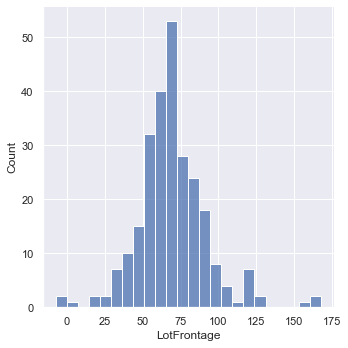

<Figure size 432x288 with 0 Axes>

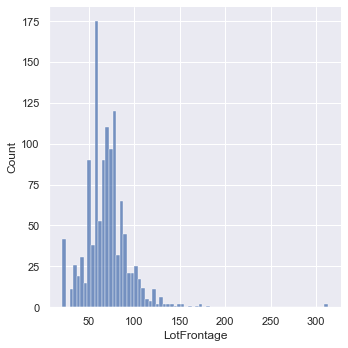

<Figure size 432x288 with 0 Axes>

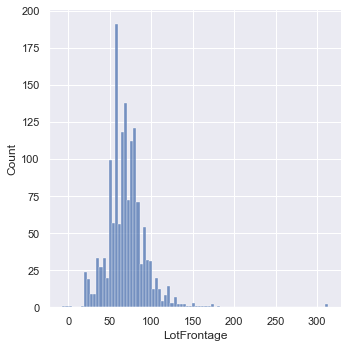

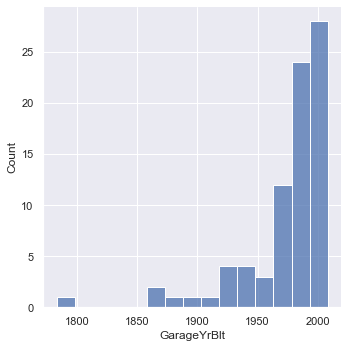

<Figure size 432x288 with 0 Axes>

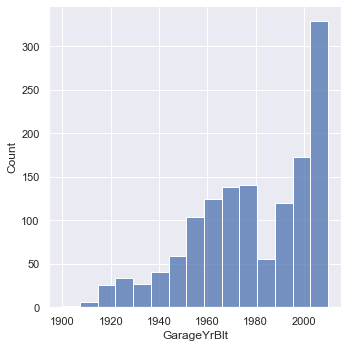

<Figure size 432x288 with 0 Axes>

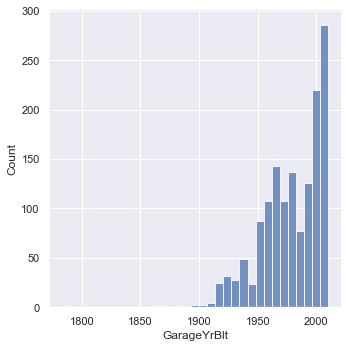

In [140]:
for col in dist_cols:
    missing = X[X[col].isna()][col]
    not_missing = X[X[col].notnull()][col]

    params = stats.johnsonsu.fit(not_missing)

    r = stats.johnsonsu.rvs(params[0], params[1], params[2], params[3], size=missing.shape[0])
    X[col].loc[missing.index] = r
    print(missing.shape)
    sns.displot(X[col].loc[missing.index])
    plt.figure()
    sns.displot(not_missing)
    plt.figure()
    sns.displot(X[col])
plt.show()